<h2>1 - Explanatory Data Analysis (EDA)</h2>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [42]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

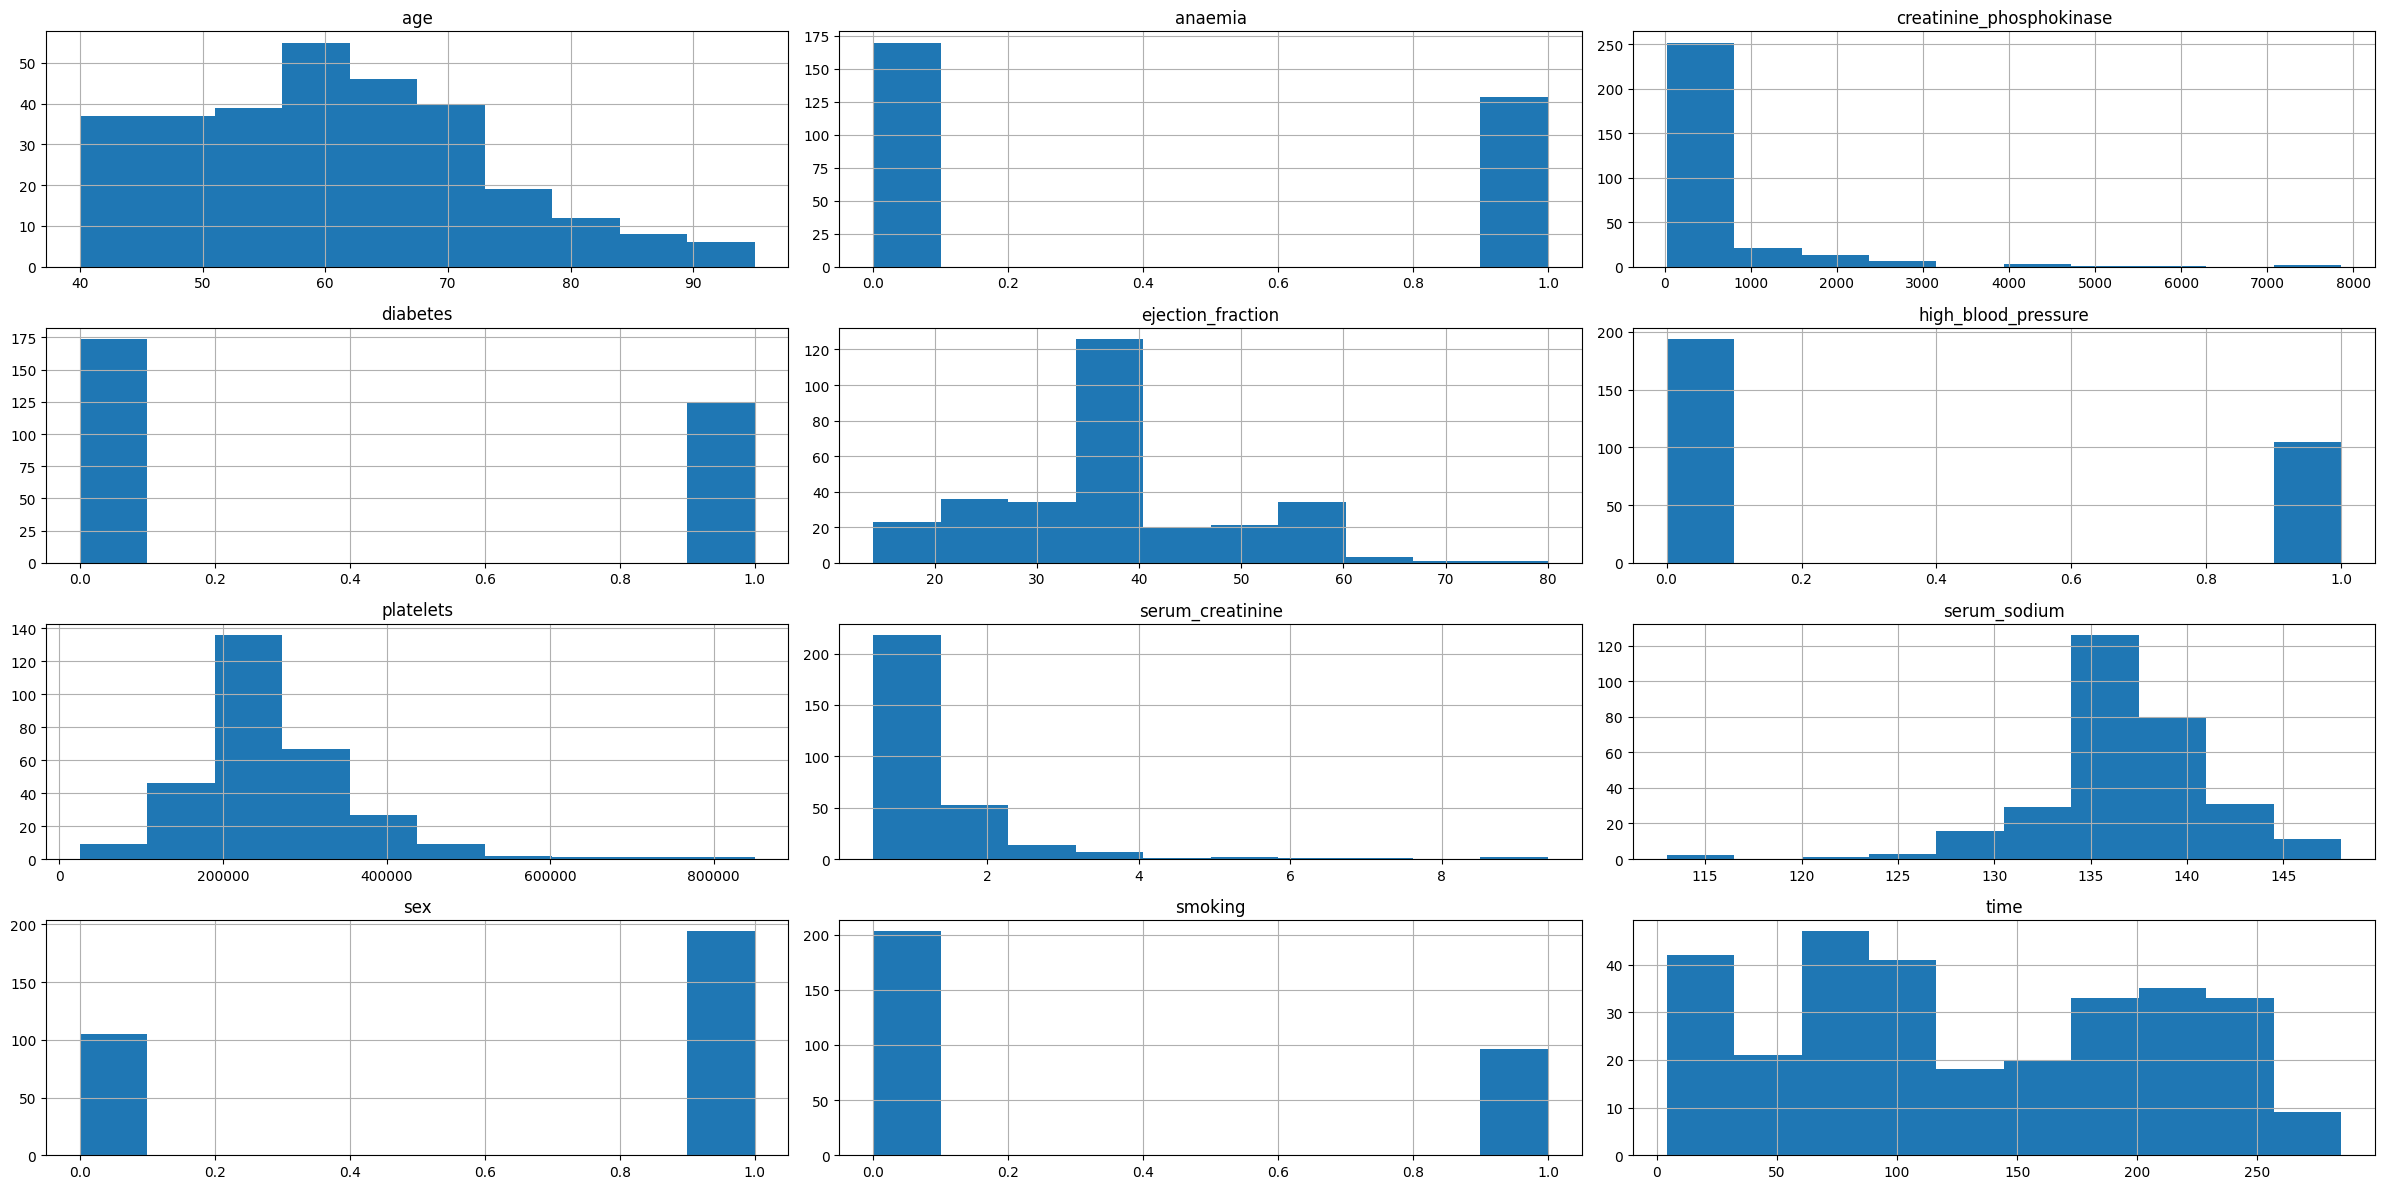

In [44]:
df.drop(columns=["DEATH_EVENT"]).hist(figsize=(20, 10))
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

<h3>Visualizing target: deaths and survivals</h3>

[Text(0, 0, 'Survived'), Text(1, 0, 'Died')]

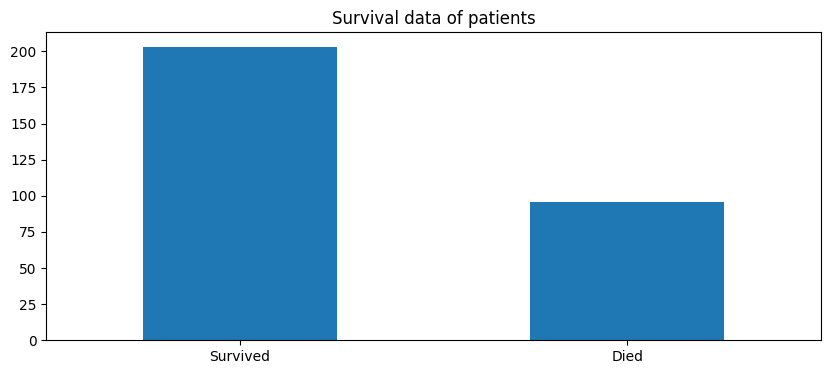

In [66]:
fig, ax = plt.subplots(figsize = (10,4))
df.DEATH_EVENT.value_counts().plot(kind="bar")
plt.title("Survival data of patients")
plt.xticks(rotation=0)
ax.set_xticklabels(["Survived", "Died"])

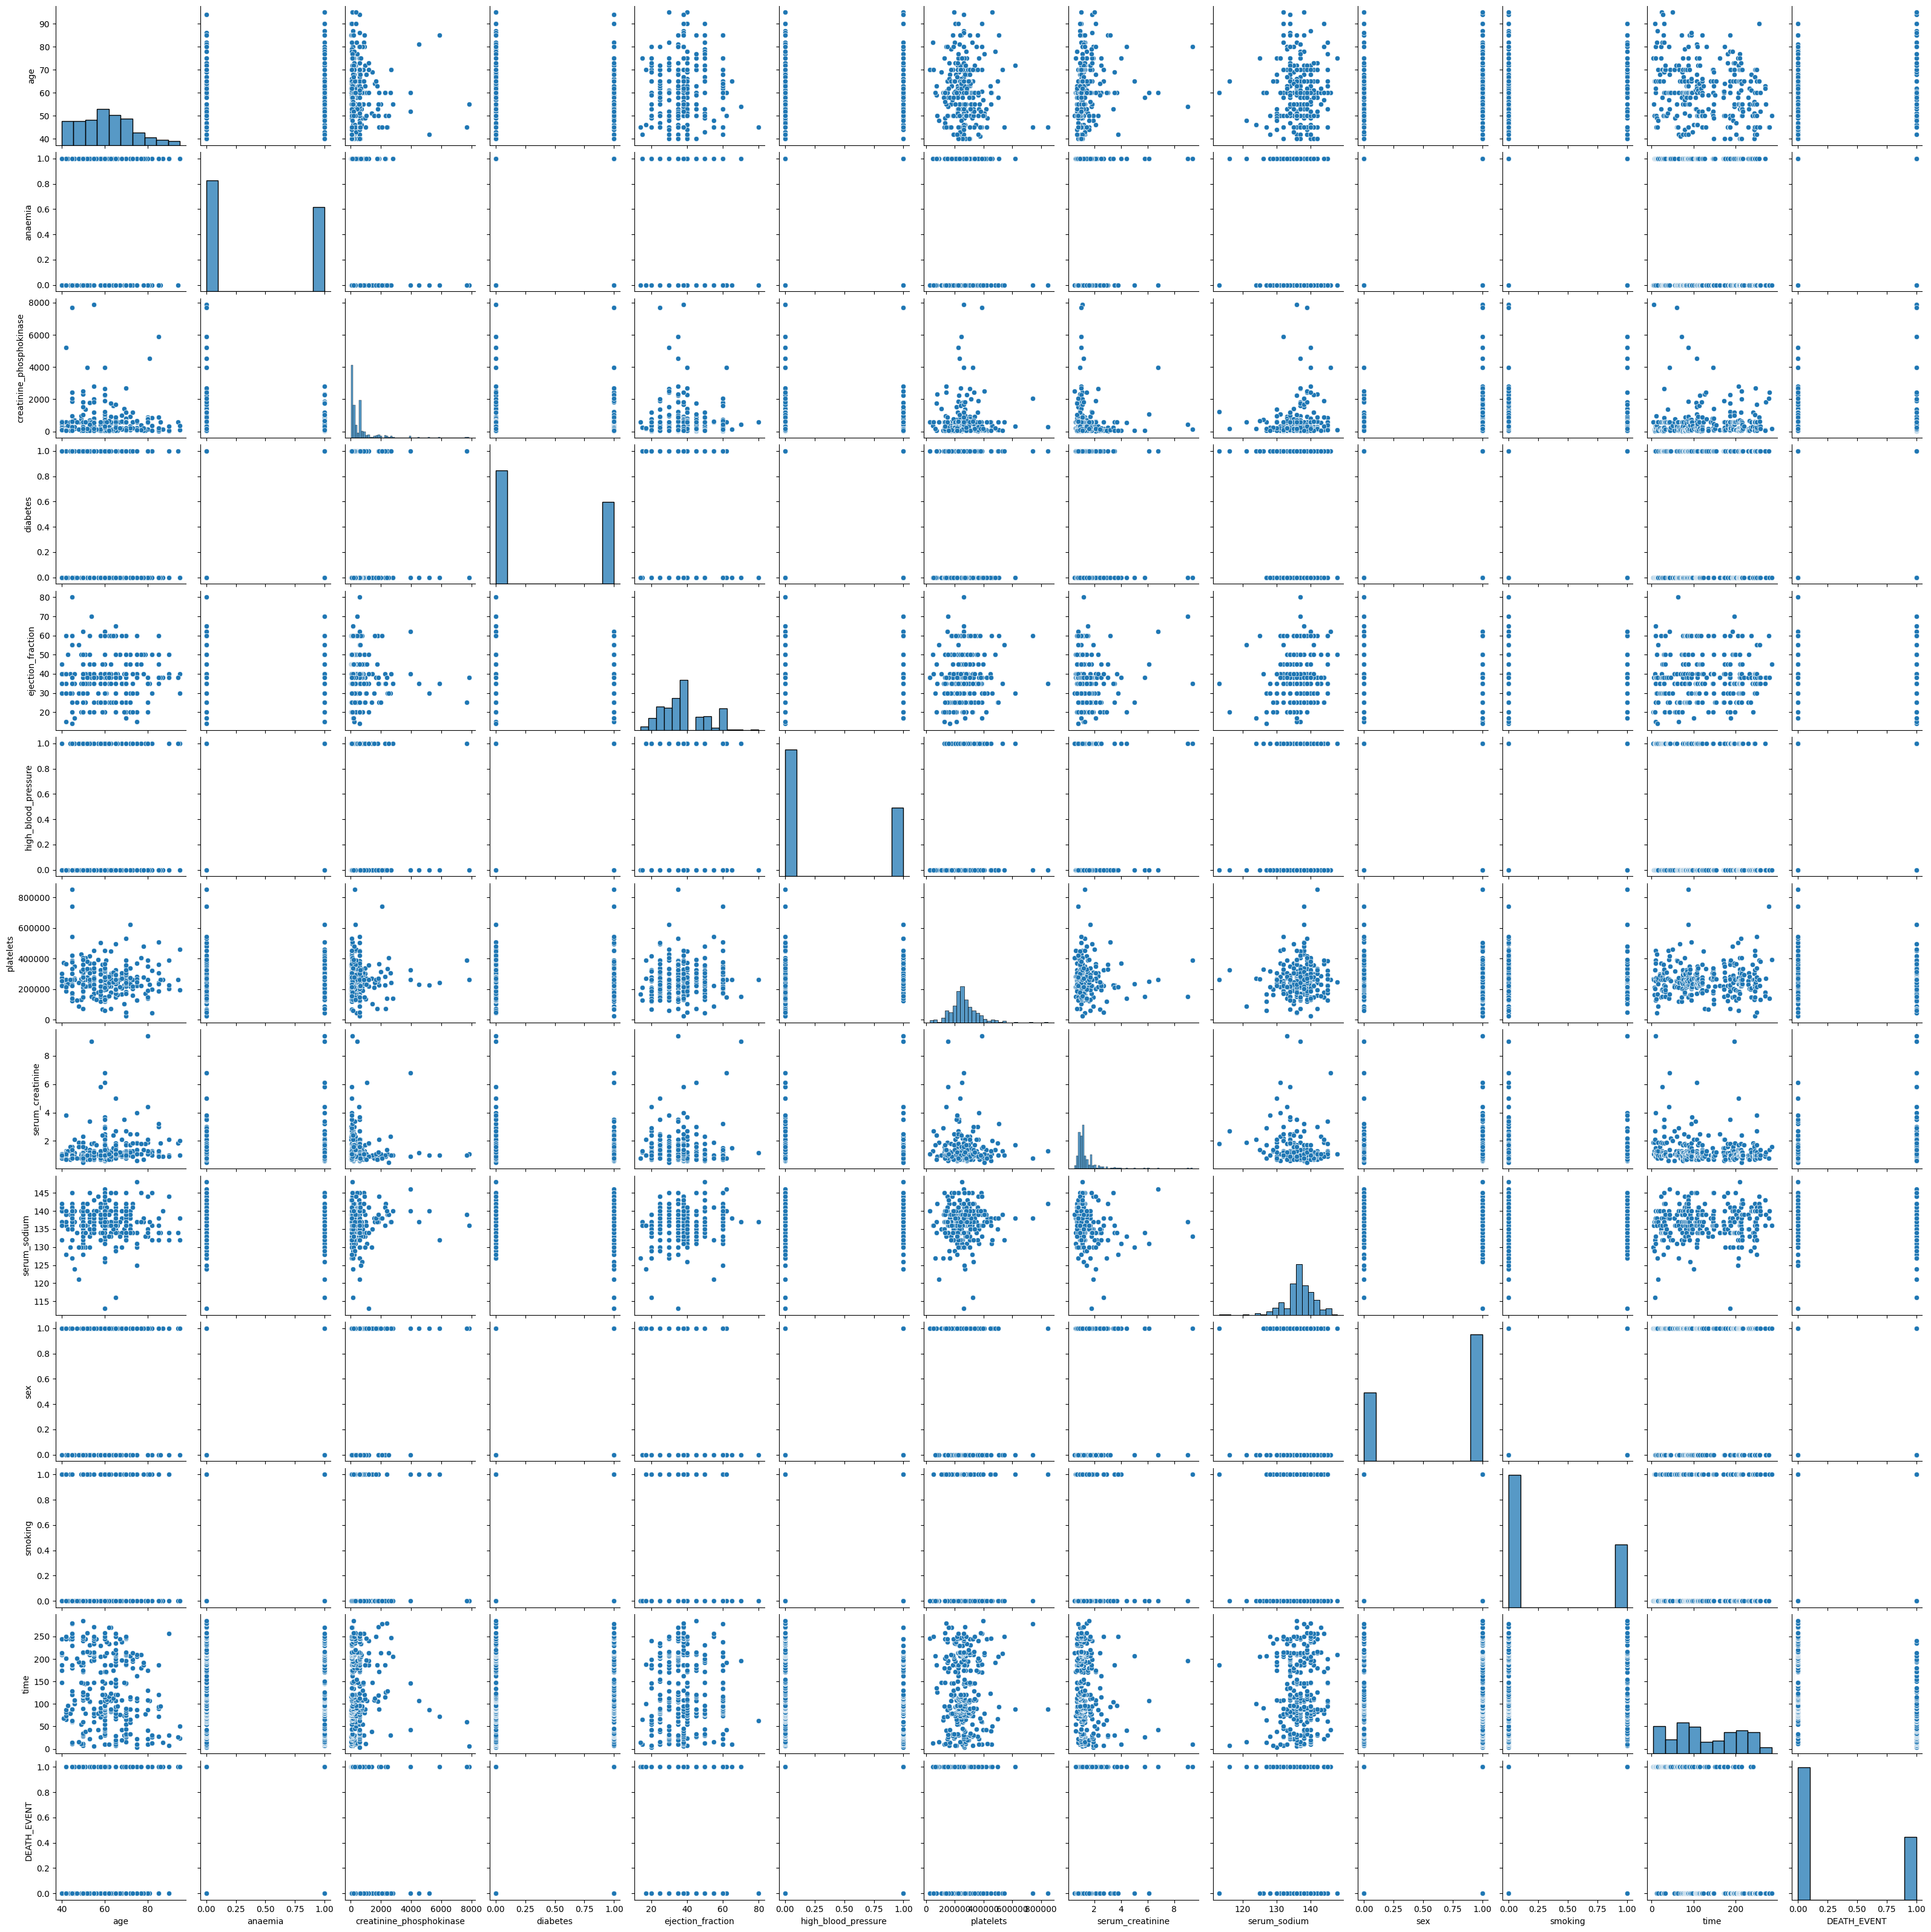

In [47]:
import seaborn as sns
sns.pairplot(df)

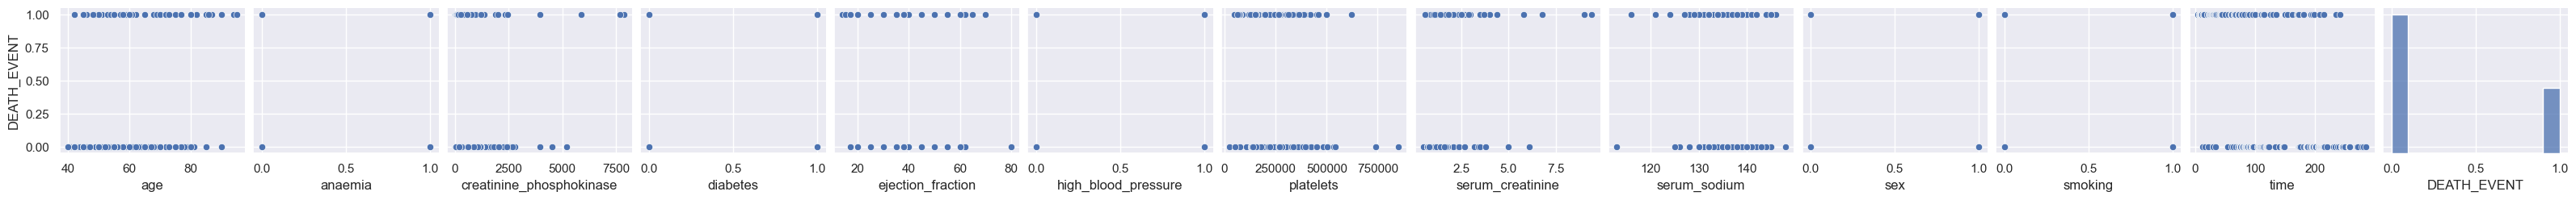

In [83]:
sns.pairplot(df, y_vars=['DEATH_EVENT'])

In [5]:
color = []
for num in df['DEATH_EVENT']:
    if num == 0:
        color.append('b')
    else:
        color.append('r')


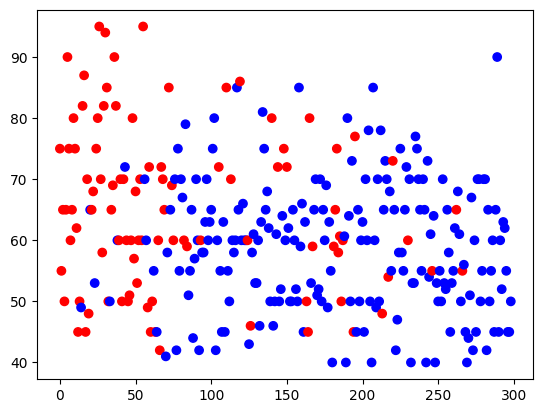

In [14]:
# plt.figure(figsize=(10, 20))
plt.scatter(y=df.age, x=np.arange(299), c=color)

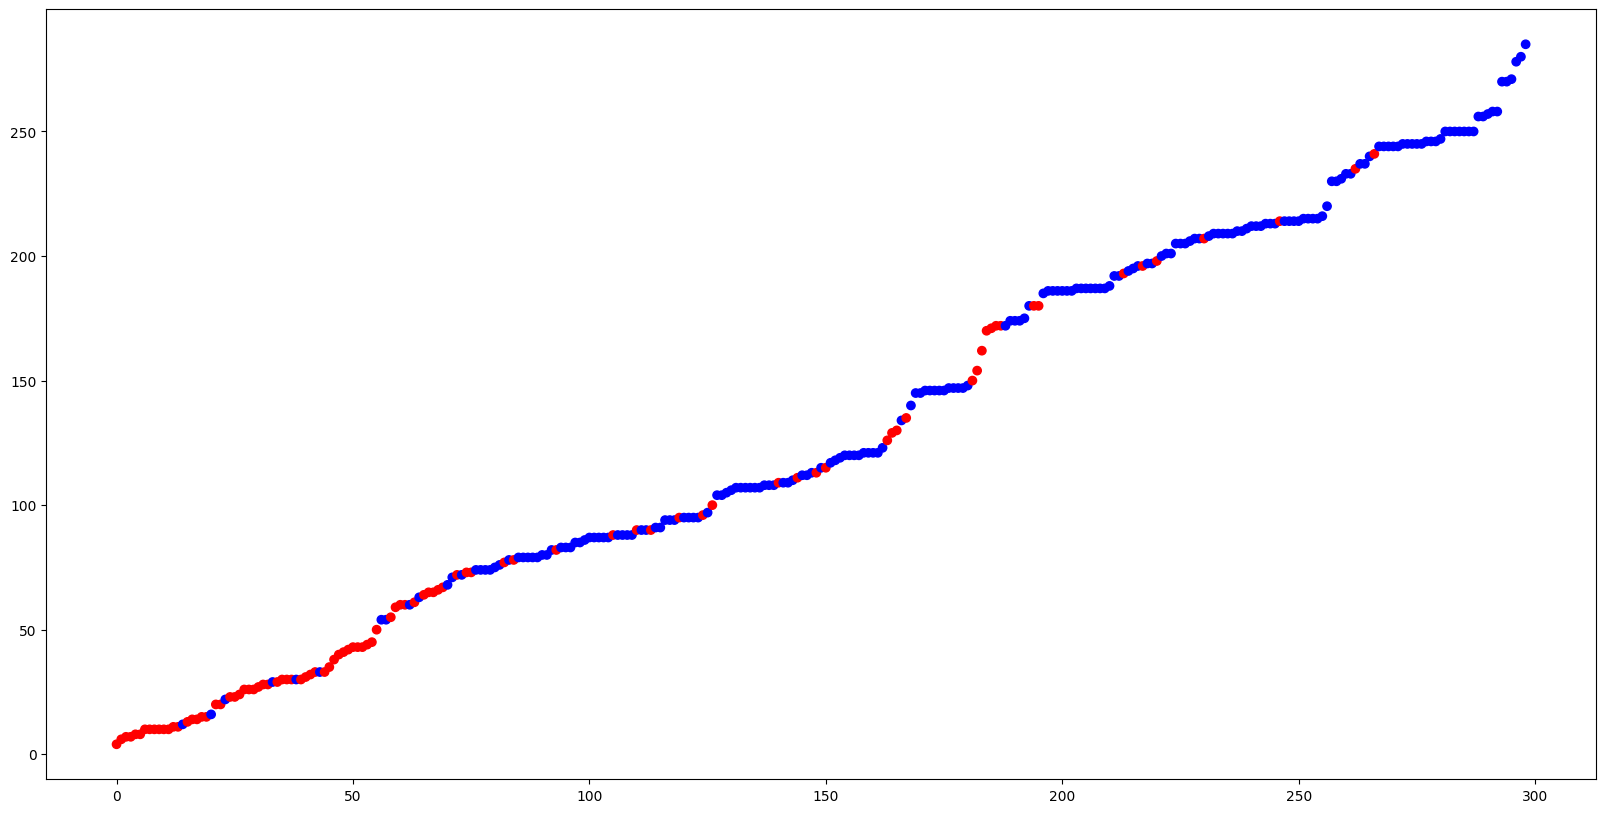

In [16]:
plt.figure(figsize=(20, 10))
plt.scatter(y=df.time, x=np.arange(299), c=color)

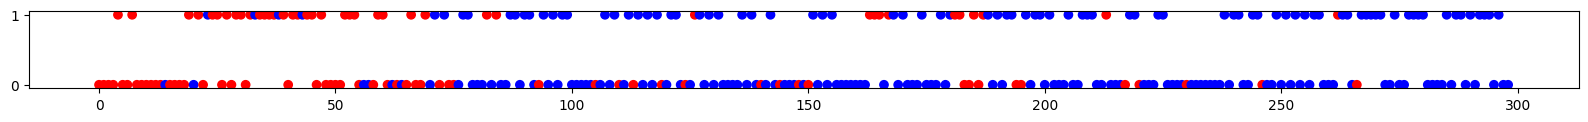

In [36]:
plt.figure(figsize=(20, 1))
plt.scatter(y=df.diabetes, x=np.arange(299), c=color)

0    203
1     96
Name: smoking, dtype: int64


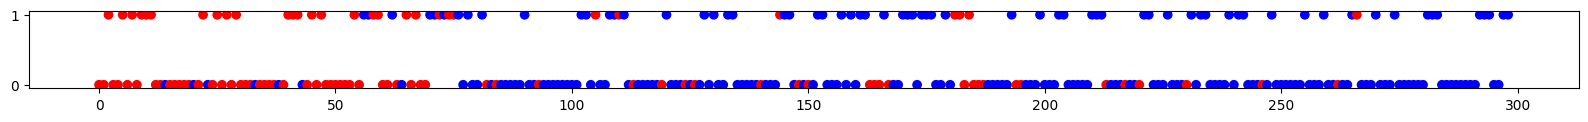

In [38]:
plt.figure(figsize=(20, 1))
plt.scatter(y=df.smoking, x=np.arange(299), c=color)
print(df.smoking.value_counts())

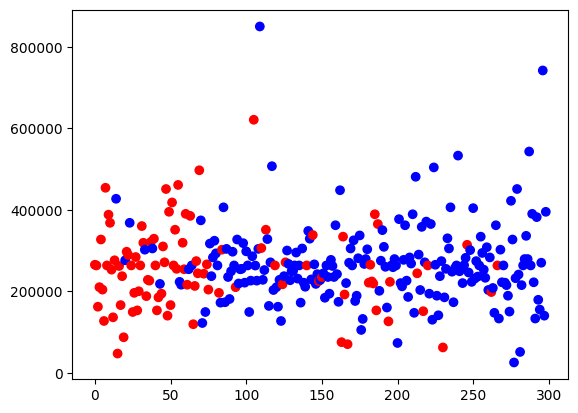

In [42]:
plt.scatter(y=df.platelets, x=np.arange(299), c=color)

0    0.648829
1    0.351171
Name: high_blood_pressure, dtype: float64


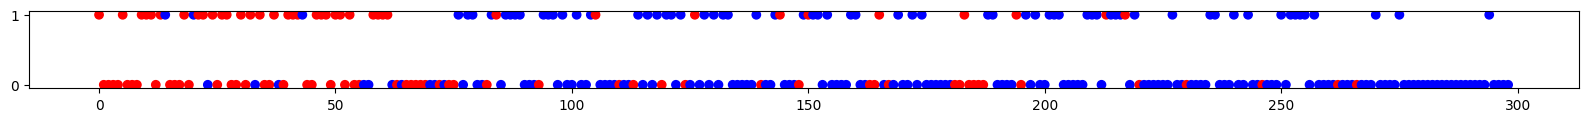

In [65]:
plt.figure(figsize=(20, 1))
plt.scatter(y=df.high_blood_pressure, x=np.arange(299), c=color)
print(df.high_blood_pressure.value_counts(normalize=True))

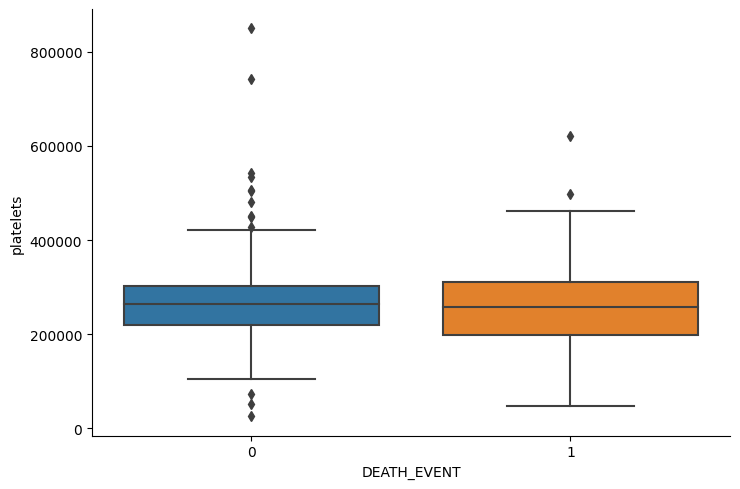

In [67]:
sns.catplot(x='DEATH_EVENT', y="platelets", data=df, kind="box", aspect=1.5)

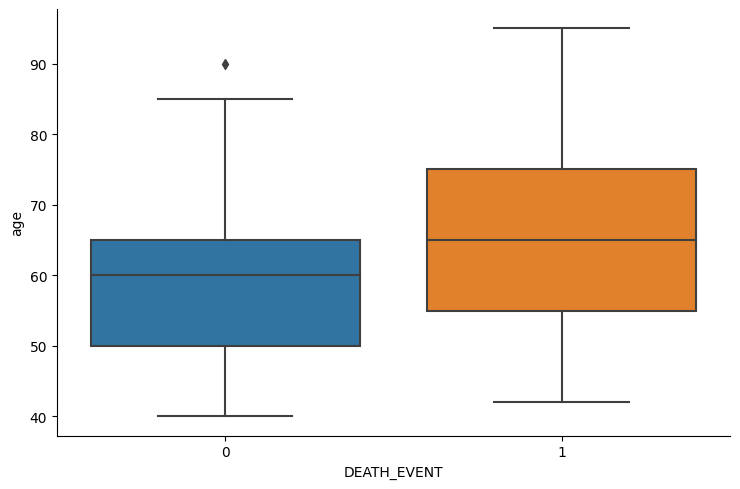

In [68]:
sns.catplot(x='DEATH_EVENT', y="age", data=df, kind="box", aspect=1.5)

<AxesSubplot: >

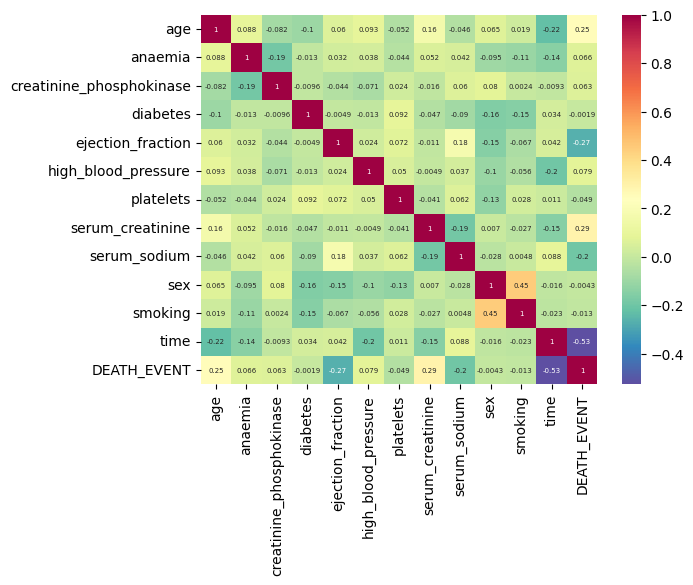

In [86]:
corrmat = df.corr()
sns.heatmap(corrmat, annot=True, annot_kws={'size': 5}, cmap="Spectral_r")

<h2>2 - Modeling and Hyperparameter Tuning</h2>

In [229]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import roc_auc_score


X = df.drop(columns=['DEATH_EVENT'])
y = df.DEATH_EVENT

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=.75)

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)


<h3>Logistic Regression</h3>

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)
roc_auc_score(y_val, model.predict(X_val))

0.7787307032590052

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', LogisticRegression())
])

model = LogisticRegression()
params = {
    "clf__C":np.logspace(-3,3,7), 
    # "clf__penalty":["l1","l2"]
    }
search = GridSearchCV(pipe, params, scoring='roc_auc', cv=cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8840315716393709
Best Hyperparameters: {'clf__C': 0.01}


<h3>Decision Tree</h3>

In [36]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
roc_auc_score(y_val, model.predict(X_val))

0.7731560891938251

In [37]:
model = DecisionTreeRegressor()
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 3, 5, 7, 9, 11, 12, None],
    'min_samples_leaf': [1, 5, 9],
    }
search = GridSearchCV(model, params, scoring='roc_auc', cv=cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.861950520208799
Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 9, 'splitter': 'best'}


<h3>Random Forest</h3>

In [38]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
roc_auc_score(y_val, model.predict(X_val))

0.8846483704974272

In [39]:
model = RandomForestRegressor()
params = {
    'bootstrap': [True, False],
    'max_depth': [1, 3, 5, 7, 9, 11, 12, None],
    }
search = GridSearchCV(model, params, scoring='roc_auc', cv=cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8951430493766708
Best Hyperparameters: {'bootstrap': True, 'max_depth': 3}


<h3>XG Boost</h3>

In [16]:
model = XGBRegressor()
model.fit(X_train, y_train)
roc_auc_score(y_val, model.predict(X_val))

0.8856209150326797

In [215]:
model = XGBClassifier()
params = {
    'max_depth': [1, 2, 6, 12, None],
    'gamma': [0, 1, 5, None],
    'eta': [.1, .5, 1],
    }
search = GridSearchCV(model, params, scoring='roc_auc', cv=cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9104535965873164
Best Hyperparameters: {'eta': 0.1, 'gamma': 0, 'max_depth': 1}


<h2>3 - Interpretation/Explanation</h2>

In [92]:
from eli5 import explain_prediction, explain_weights, show_weights
from eli5.sklearn import PermutationImportance
import random
import shap
import lime
from lime import lime_tabular

<h3>Logistic Regression</h3>

<h5>ELI5 Weights</h5>

In [82]:
model = LogisticRegression(C=0.01, penalty='l2')
model.fit(X_train, y_train)
explain_weights(model, feature_names=list(X.columns))

Explanation(estimator='LogisticRegression(C=0.01)', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='age', weight=0.04673469648934316, std=None, value=None), FeatureWeight(feature='serum_sodium', weight=0.01266088406123535, std=None, value=None), FeatureWeight(feature='serum_creatinine', weight=0.0061066039579323736, std=None, value=None), FeatureWeight(feature='sex', weight=0.0005570849030428874, std=None, value=None), FeatureWeight(feature='anaemia', weight=0.0002962130914544242, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=0.00020463571496489398, std=None, value=None), FeatureWeight(feature='high_blood_pressure', weight=0.0001933310927371502, std=None, value=None), FeatureWeight(feature='diabetes', weight=0.00014269466270188337, std=None, value=None), FeatureWeight(feature='creatinine_phosphokinase', weight=5.975885426545716e-05, std=None, value=None)], neg=[FeatureWeight(feature='ejection_fraction', weight=-0.06066182155128513, std=None, value=None), FeatureWeight(feature='time', weight=-0.02031357831084419, std=None, value=None), FeatureWeight(feature='smoking', weight=-3.662231617890722e-05, std=None, value=None), FeatureWeight(feature='platelets', weight=-3.1149868682176905e-06, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

<h5>ELI5 Negative Prediction</h5>

In [88]:
explain_prediction(model, X.sample(1), feature_names=list(X.columns))

Explanation(estimator='LogisticRegression(C=0.01)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='time', weight=3.778325565817019, std=None, value=186.0), FeatureWeight(feature='ejection_fraction', weight=2.1231637542949797, std=None, value=35.0), FeatureWeight(feature='platelets', weight=0.8203568050896807, std=None, value=263358.03), FeatureWeight(feature='smoking', weight=3.662231617890722e-05, std=None, value=1.0)], neg=[FeatureWeight(feature='age', weight=-2.80408178936059, std=None, value=60.0), FeatureWeight(feature='serum_sodium', weight=-1.4306798989195946, std=None, value=113.0), FeatureWeight(feature='creatinine_phosphokinase', weight=-0.07236797251546861, std=None, value=1211.0), FeatureWeight(feature='serum_creatinine', weight=-0.010991887124278272, std=None, value=1.8), FeatureWeight(feature='sex', weight=-0.0005570849030428874, std=None, value=1.0), FeatureWeight(feature='<BIAS>', weight=-0.00020463571496489398, std=None, value=1.0), FeatureWeight(feature='diabetes', weight=-0.00014269466270188337, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.9170448883465813, score=-2.4028567843172177, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

<h5>ELI5 Positive Prediction</h5>

In [89]:
explain_prediction(model, X.sample(1), feature_names=list(X.columns))

Explanation(estimator='LogisticRegression(C=0.01)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='age', weight=2.570408306913874, std=None, value=55.0), FeatureWeight(feature='serum_sodium', weight=1.734541116389243, std=None, value=137.0), FeatureWeight(feature='serum_creatinine', weight=0.006717264353725612, std=None, value=1.1), FeatureWeight(feature='creatinine_phosphokinase', weight=0.0028086661504764863, std=None, value=47.0), FeatureWeight(feature='sex', weight=0.0005570849030428874, std=None, value=1.0), FeatureWeight(feature='<BIAS>', weight=0.00020463571496489398, std=None, value=1.0), FeatureWeight(feature='high_blood_pressure', weight=0.0001933310927371502, std=None, value=1.0)], neg=[FeatureWeight(feature='ejection_fraction', weight=-2.1231637542949797, std=None, value=35.0), FeatureWeight(feature='time', weight=-1.604772686556691, std=None, value=79.0), FeatureWeight(feature='platelets', weight=-0.5388927282016605, std=None, value=173000.0)], pos_remaining=0, neg_remaining=0), proba=0.5121479180139444, score=0.04860123646473293, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

<h3>Decision Tree</h3>

<h5>ELI5 Feature Importance</h5>

In [98]:
model = DecisionTreeRegressor(criterion='poisson', max_depth= 5, min_samples_leaf=9, splitter='best')
model.fit(X_train, y_train)
perm = PermutationImportance(model).fit(X_val, y_val)
show_weights(perm, feature_names=list(X.columns))

<h5>ELI5 Negative Prediction</h5>

In [109]:
explain_prediction(model, X_val.sample(1), feature_names=list(X.columns))

Explanation(estimator="DecisionTreeRegressor(criterion='poisson', max_depth=5, min_samples_leaf=9)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.33035714285714285, std=None, value=1.0)], neg=[FeatureWeight(feature='time', weight=-0.16964285714285712, std=None, value=79.0), FeatureWeight(feature='serum_creatinine', weight=-0.07560790273556232, std=None, value=0.7), FeatureWeight(feature='ejection_fraction', weight=-0.037487335359675786, std=None, value=50.0)], pos_remaining=0, neg_remaining=0), proba=None, score=0.047619047619047616, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

<h5>ELI5 Positive Prediction</h5>

In [106]:
explain_prediction(model, X_val.sample(1), feature_names=list(X.columns))

Explanation(estimator="DecisionTreeRegressor(criterion='poisson', max_depth=5, min_samples_leaf=9)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='serum_creatinine', weight=0.3948412698412699, std=None, value=1.8), FeatureWeight(feature='<BIAS>', weight=0.33035714285714285, std=None, value=1.0), FeatureWeight(feature='platelets', weight=0.2777777777777778, std=None, value=172000.0)], neg=[FeatureWeight(feature='time', weight=-0.16964285714285712, std=None, value=78.0)], pos_remaining=0, neg_remaining=0), proba=None, score=0.8333333333333334, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

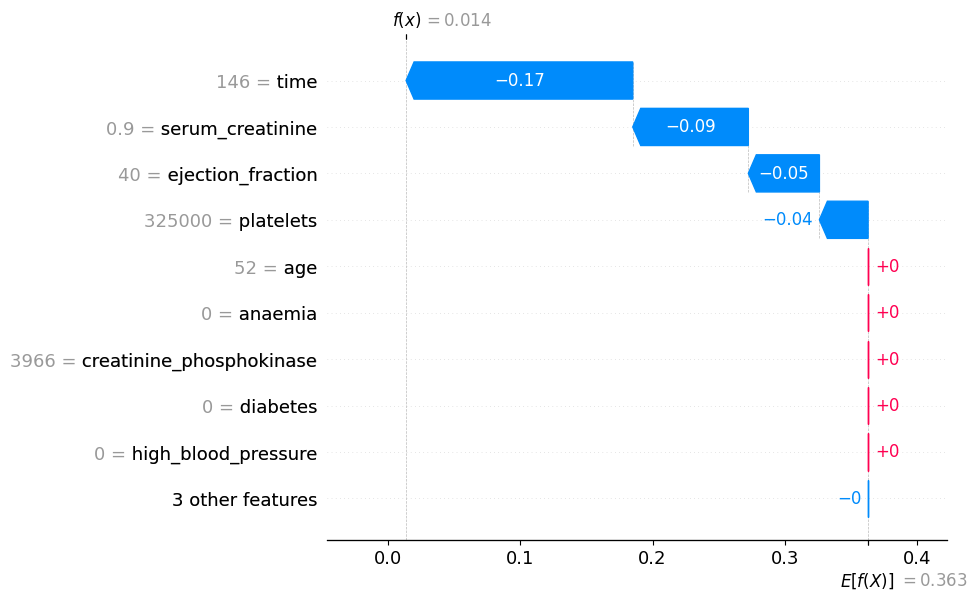

In [47]:
exp = shap.Explainer(model.predict, X_val)
shap_values = exp(X_val)
shap.plots.waterfall(shap_values[0])

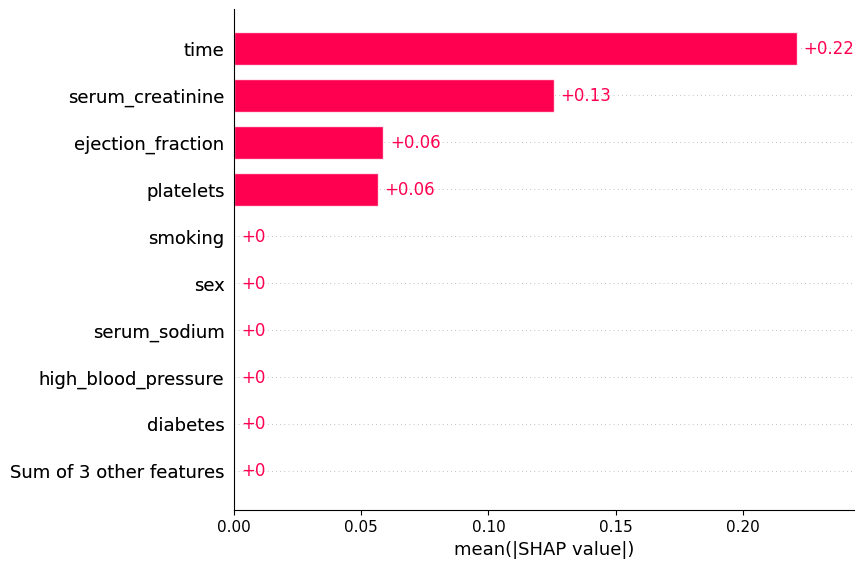

In [48]:
shap.plots.bar(shap_values)

<h3>Random Forest</h3>

In [176]:
model = RandomForestRegressor(bootstrap=True, max_depth=3)
model.fit(X_train, y_train)
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_val), feature_names=list(X.columns), class_names=['Lived', 'Died'], verbose=True, mode='regression')
exp = explainer.explain_instance(np.array(X_val).any(0), model.predict, num_features=5)
exp.show_in_notebook()

Intercept 0.2328855372193234
Prediction_local [0.77317219]
Right: 0.703575680789429


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


<h3>XG Boost</h3>

<h5>LIME Explainer</h5>

In [183]:
model = XGBRegressor(eta=0.1, gamma=1, max_depth=3)
model.fit(X_train, y_train)
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_val), feature_names=list(X.columns), class_names=['Lived', 'Died'], verbose=True, mode='regression')
exp = explainer.explain_instance(np.array(X_val).any(0), model.predict, num_features=5)
exp.show_in_notebook()

Intercept 0.2495987378250853
Prediction_local [0.67673259]
Right: 0.7865541


<h5>Shap Tree Explainer of full validation set</h5>

In [202]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, feature_names=list(X.columns))

<h5>Shap Tree Explainer of negative target</h5>

In [209]:
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=list(X.columns))

<h5>Shap Tree Explainer of positive target</h5>

In [208]:
shap.force_plot(explainer.expected_value, shap_values[3], feature_names=list(X.columns))

<h5>XGBoost Tree Visualization</h5>

<AxesSubplot: >

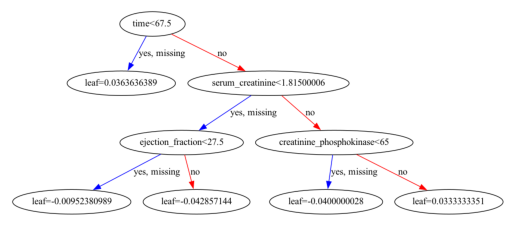

In [197]:
from xgboost import plot_tree, plot_importance
plot_tree(model)

<h2>4 - Predicting Observations</h2>

<h3>Finding probabilities of each model</h3>

In [236]:
#Switching to classifiers to use predict_proba method
lr = LogisticRegression(C=0.01, penalty='l2')
dt = DecisionTreeClassifier(max_depth= 5, min_samples_leaf=9, splitter='best')
rf = RandomForestClassifier(bootstrap=True, max_depth=3)
xgb = XGBClassifier(eta=0.1, gamma=1, max_depth=3)

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

lr_probabilities = lr.predict_proba(X_val)
dt_probabilities = dt.predict_proba(X_val)
rf_probabilities = rf.predict_proba(X_val)
xgb_probabilities = xgb.predict_proba(X_val)


<h3>Negative Target Probabilities</h3>

In [258]:
# The below shows predictions for each model when the target value was negative
# Logistic Regression was confident it was positive
# Decision Tree was confident it was negative
# Random Forest was split
# XG Boost was very confident it was negative
# Thus, DT and XGB are the most accurate, with XGB having the highest confidence of the correct answer

print("Logistic Regression:", lr_probabilities[0])
print("Decision Tree:", dt_probabilities[0])
print("Random Forest:", rf_probabilities[0])
print("XG Boost:", xgb_probabilities[0])

Logistic Regression: [0.71889879 0.28110121]
Decision Tree: [0.22222222 0.77777778]
Random Forest: [0.46783977 0.53216023]
XG Boost: [0.100703 0.899297]


In [259]:
# The below shows predictions for each model when the target value was positive
# Logistic Regression was very confident it was positive
# Decision Tree was completely confident it was positive
# Random Forest was very confident it was positive
# XG Boost was almost completely confident it was positive
# Thus, every model was accurate, with XGB having the highest confidence of the correct answer
# But in general, this indicates that a negative event is much easier to predict than a positive

print("Logistic Regression:", lr_probabilities[4])
print("Decision Tree:", dt_probabilities[4])
print("Random Forest:", rf_probabilities[4])
print("XG Boost:", xgb_probabilities[4])

Logistic Regression: [0.98992821 0.01007179]
Decision Tree: [1. 0.]
Random Forest: [0.86878131 0.13121869]
XG Boost: [0.98236245 0.01763754]
